In [1]:
import pandas as pd
import re
import datetime
import csv
import numpy as np



While we have systematic checks in place to ensure the general system health of each compute node, we would like to use long-term data to see if there are any clusters of job failures on specific nodes. Do any of the production partition nodes show an unusual number of failed jobs relative to the others? Ignore the debug partition for this question.


First I wanted to pull in the full CSV file and apply some of the above cleaning.

In [2]:
full_df = pd.read_csv('data/accre-jobs-2020.csv', error_bad_lines=False)

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 268649: expected 13 fields, saw 16\nSkipping line 281380: expected 13 fields, saw 14\nSkipping line 283158: expected 13 fields, saw 48\nSkipping line 289776: expected 13 fields, saw 70\nSkipping line 290568: expected 13 fields, saw 15\nSkipping line 317525: expected 13 fields, saw 14\n'
b'Skipping line 329958: expected 13 fields, saw 14\nSkipping line 330461: expected 13 fields, saw 14\nSkipping line 332666: expected 13 fields, saw 15\nSkipping line 332762: expected 13 fields, saw 14\nSkipping line 332764: expected 13 fields, saw 14\nSkipping line 332766: expected 13 fields, saw 14\nSkipping line 332768: expected 13 fields, saw 14\nSkipping line 332769: expected 13 fields, saw 16\nSkipping line 332770: expected 13 fields, saw 14\nSkipping line 332898: expected 13 fields, saw 16\nSkipping line 332899: expected 13 fields, saw 14\nSkipping line 332900: expected 13 fields, saw 16\nSkipping line 332901: expected 13 fields, saw 14\nSkipping line 332902: expected 13 fields, sa

b'Skipping line 531726: expected 13 fields, saw 14\nSkipping line 543870: expected 13 fields, saw 14\nSkipping line 543903: expected 13 fields, saw 14\nSkipping line 544434: expected 13 fields, saw 14\nSkipping line 545969: expected 13 fields, saw 14\nSkipping line 546305: expected 13 fields, saw 43\nSkipping line 547218: expected 13 fields, saw 15\nSkipping line 547223: expected 13 fields, saw 56\nSkipping line 547224: expected 13 fields, saw 20\nSkipping line 547225: expected 13 fields, saw 22\nSkipping line 547226: expected 13 fields, saw 20\nSkipping line 547228: expected 13 fields, saw 19\nSkipping line 547230: expected 13 fields, saw 23\nSkipping line 547231: expected 13 fields, saw 25\nSkipping line 547233: expected 13 fields, saw 33\nSkipping line 547234: expected 13 fields, saw 53\nSkipping line 547245: expected 13 fields, saw 20\nSkipping line 547353: expected 13 fields, saw 14\nSkipping line 547359: expected 13 fields, saw 19\nSkipping line 547360: expected 13 fields, saw 21

b'Skipping line 660901: expected 13 fields, saw 15\nSkipping line 661332: expected 13 fields, saw 15\nSkipping line 662656: expected 13 fields, saw 14\nSkipping line 662863: expected 13 fields, saw 51\nSkipping line 662901: expected 13 fields, saw 15\nSkipping line 662902: expected 13 fields, saw 14\nSkipping line 662903: expected 13 fields, saw 14\nSkipping line 662904: expected 13 fields, saw 14\nSkipping line 662905: expected 13 fields, saw 14\nSkipping line 662906: expected 13 fields, saw 14\nSkipping line 662910: expected 13 fields, saw 14\nSkipping line 662914: expected 13 fields, saw 14\nSkipping line 662915: expected 13 fields, saw 15\nSkipping line 662916: expected 13 fields, saw 15\nSkipping line 662917: expected 13 fields, saw 15\nSkipping line 662918: expected 13 fields, saw 15\nSkipping line 662921: expected 13 fields, saw 15\nSkipping line 662922: expected 13 fields, saw 16\nSkipping line 662923: expected 13 fields, saw 19\nSkipping line 662924: expected 13 fields, saw 19

b'Skipping line 791715: expected 13 fields, saw 14\nSkipping line 791716: expected 13 fields, saw 14\nSkipping line 791946: expected 13 fields, saw 14\nSkipping line 802071: expected 13 fields, saw 36\nSkipping line 803524: expected 13 fields, saw 14\nSkipping line 803526: expected 13 fields, saw 16\nSkipping line 803532: expected 13 fields, saw 14\nSkipping line 805310: expected 13 fields, saw 14\nSkipping line 807766: expected 13 fields, saw 16\nSkipping line 807886: expected 13 fields, saw 14\nSkipping line 807912: expected 13 fields, saw 14\nSkipping line 807915: expected 13 fields, saw 16\nSkipping line 809885: expected 13 fields, saw 16\nSkipping line 810653: expected 13 fields, saw 15\nSkipping line 819442: expected 13 fields, saw 14\nSkipping line 820633: expected 13 fields, saw 15\nSkipping line 821828: expected 13 fields, saw 17\nSkipping line 821846: expected 13 fields, saw 24\nSkipping line 821852: expected 13 fields, saw 20\nSkipping line 821853: expected 13 fields, saw 20

b'Skipping line 1386352: expected 14 fields, saw 31\nSkipping line 1410576: expected 14 fields, saw 20\nSkipping line 1410942: expected 14 fields, saw 19\nSkipping line 1419277: expected 14 fields, saw 18\nSkipping line 1421945: expected 14 fields, saw 16\nSkipping line 1422429: expected 14 fields, saw 16\nSkipping line 1422430: expected 14 fields, saw 16\nSkipping line 1422431: expected 14 fields, saw 16\nSkipping line 1422432: expected 14 fields, saw 16\nSkipping line 1422433: expected 14 fields, saw 15\nSkipping line 1422434: expected 14 fields, saw 15\nSkipping line 1422435: expected 14 fields, saw 15\nSkipping line 1422436: expected 14 fields, saw 15\nSkipping line 1422437: expected 14 fields, saw 16\nSkipping line 1422439: expected 14 fields, saw 15\nSkipping line 1422542: expected 14 fields, saw 16\nSkipping line 1425142: expected 14 fields, saw 31\nSkipping line 1425366: expected 14 fields, saw 34\nSkipping line 1425553: expected 14 fields, saw 29\nSkipping line 1426269: expect

b'Skipping line 2205329: expected 14 fields, saw 15\nSkipping line 2205360: expected 14 fields, saw 18\nSkipping line 2205364: expected 14 fields, saw 16\nSkipping line 2205371: expected 14 fields, saw 15\nSkipping line 2205376: expected 14 fields, saw 16\nSkipping line 2205381: expected 14 fields, saw 15\nSkipping line 2205410: expected 14 fields, saw 15\nSkipping line 2205411: expected 14 fields, saw 17\nSkipping line 2205415: expected 14 fields, saw 17\nSkipping line 2205418: expected 14 fields, saw 17\nSkipping line 2205422: expected 14 fields, saw 17\nSkipping line 2205430: expected 14 fields, saw 16\nSkipping line 2205432: expected 14 fields, saw 17\nSkipping line 2205435: expected 14 fields, saw 16\nSkipping line 2205436: expected 14 fields, saw 19\nSkipping line 2205438: expected 14 fields, saw 17\nSkipping line 2205440: expected 14 fields, saw 17\nSkipping line 2205444: expected 14 fields, saw 19\nSkipping line 2205445: expected 14 fields, saw 16\nSkipping line 2205446: expect

b'Skipping line 2315585: expected 14 fields, saw 15\nSkipping line 2315586: expected 14 fields, saw 16\nSkipping line 2315590: expected 14 fields, saw 15\nSkipping line 2320415: expected 14 fields, saw 17\nSkipping line 2320416: expected 14 fields, saw 16\nSkipping line 2320417: expected 14 fields, saw 16\nSkipping line 2320418: expected 14 fields, saw 17\nSkipping line 2320419: expected 14 fields, saw 17\nSkipping line 2320420: expected 14 fields, saw 16\nSkipping line 2320421: expected 14 fields, saw 16\nSkipping line 2320422: expected 14 fields, saw 16\nSkipping line 2320423: expected 14 fields, saw 15\nSkipping line 2320424: expected 14 fields, saw 17\nSkipping line 2320425: expected 14 fields, saw 17\nSkipping line 2320426: expected 14 fields, saw 15\nSkipping line 2320427: expected 14 fields, saw 15\nSkipping line 2320428: expected 14 fields, saw 17\nSkipping line 2320429: expected 14 fields, saw 17\nSkipping line 2320430: expected 14 fields, saw 17\nSkipping line 2320431: expect

b'Skipping line 2959883: expected 14 fields, saw 16\nSkipping line 2959884: expected 14 fields, saw 16\nSkipping line 2960561: expected 14 fields, saw 16\nSkipping line 2969847: expected 14 fields, saw 15\nSkipping line 2981820: expected 14 fields, saw 19\nSkipping line 3005622: expected 14 fields, saw 16\n'
b'Skipping line 3019713: expected 14 fields, saw 16\nSkipping line 3021043: expected 14 fields, saw 16\nSkipping line 3021044: expected 14 fields, saw 16\nSkipping line 3032685: expected 14 fields, saw 15\nSkipping line 3032905: expected 14 fields, saw 15\nSkipping line 3034752: expected 14 fields, saw 15\nSkipping line 3046015: expected 14 fields, saw 26\nSkipping line 3063701: expected 14 fields, saw 21\nSkipping line 3064318: expected 14 fields, saw 15\n'
b'Skipping line 3085675: expected 14 fields, saw 16\nSkipping line 3119735: expected 14 fields, saw 16\nSkipping line 3119756: expected 14 fields, saw 16\n'
b'Skipping line 3227316: expected 14 fields, saw 15\n'
b'Skipping line

In [3]:
full_df = full_df[full_df['PARTITION']=='production']
full_df['REQMEM_IDEN'] = full_df['REQMEM'].str.extract('\d+(\w+)')
full_df['REQMEM_NUM'] = full_df['REQMEM'].str.extract('(\d+)\w+')
full_df['USEDMEM_NUM'] = full_df['USEDMEM'].str.extract('(\d+\.*\d*)\w+')

Unlike the other questions, I wanted only failed jobs so that I could find the problem nodes.

In [4]:
failed_jobs = full_df[full_df['EXITCODE']!='0:0']

I then wanted to create a data frame where we had only the name of the node and the number of times it had a failure (which is what node_failure_df is)

In [5]:
node_failure_counts = failed_jobs['NODELIST'].value_counts()

In [6]:
node_failure_df = pd.DataFrame(node_failure_counts)

In [7]:
node_failure_df = node_failure_df.reset_index()

In [8]:
node_failure_df.columns = ['NODELIST','FAIL_COUNT']

In [9]:
problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>4]
problem_nodes
#i chose 4 because about 27 nodes had 4 failures while only 11 had five, so that seemed a good cut off point. i found this using a .value_counts on problem_node['FAIL_COUNT']

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn1347,15
2,cn416,15
3,cn304,14
4,cn1085,10
5,cn1364,9
6,cn1377,9
7,cn1273,9
8,cn363,9
9,cn394,9


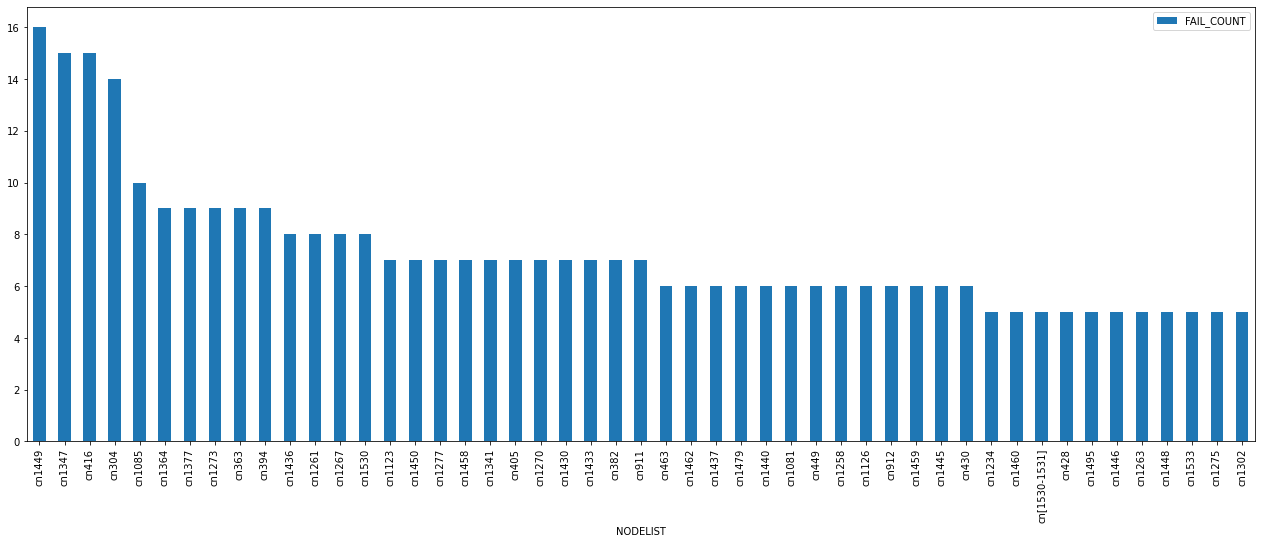

In [10]:
problem_nodes.plot(kind='bar',x='NODELIST', y='FAIL_COUNT', figsize=(22,8));

This is still quite a bit of nodes, so I decided to slice the data further, only taking the top 4 nodes. I chose this because cn304 had 14 failures, whereas cn1085 had 10. This is the biggest dropoff seen in the data.

In [11]:
big_problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>10]
big_problem_nodes

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn1347,15
2,cn416,15
3,cn304,14


It's not fair to go purely by count since some nodes may be used more than others or used on harder jobs than others, so I decided to use %failed as well as compare memory useage.

In [39]:
total_jobs_df = full_df['NODELIST'].value_counts()

In [40]:
total_jobs_df = pd.DataFrame(total_jobs)

In [41]:
total_jobs_df = total_jobs_df.reset_index()

In [42]:
total_jobs_df.columns = ['NODELIST','JOB_COUNT']

In [43]:
node_failure_df = node_failure_df.merge(total_jobs_df, on='NODELIST')

In [44]:
node_failure_df['PERCENT_FAILED'] = (node_failure_df['FAIL_COUNT'] / node_failure_df['JOB_COUNT']) *100

In [47]:
node_failure_df.sort_values('JOB_COUNT', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT_x,PERCENT_FAILED,JOB_COUNT_y,JOB_COUNT
417,cn1367,1,13432,0.007445,13432,13432
423,cn1121,1,10591,0.009442,10591,10591
298,cn1399,1,10486,0.009537,10486,10486
253,cn1292,1,10375,0.009639,10375,10375
275,cn1388,1,10250,0.009756,10250,10250
...,...,...,...,...,...,...
347,cn[1357-1358],1,1,100.000000,1,1
345,cn[1442-1443,1,1,100.000000,1,1
271,cn[1430-1433],1,1,100.000000,1,1
358,cn[1496-1497],1,1,100.000000,1,1


In [54]:
problem_nodes = node_failure_df[node_failure_df['JOB_COUNT']>3]

In [55]:
problem_nodes.sort_values('PERCENT_FAILED', ascending=False).head(50)

,NODELIST,FAIL_COUNT,JOB_COUNT_x,PERCENT_FAILED,JOB_COUNT_y,JOB_COUNT
40,cn[1530-1531],5,6,83.333333,6,6
100,cn[1273-1275],3,4,75.000000,4,4
84,cn[1437,3,4,75.000000,4,4
93,cn[1318-1320],3,4,75.000000,4,4
97,cn[1352,3,4,75.000000,4,4
108,cn[1505-1506],3,5,60.000000,5,5
86,cn[1422-1423],3,5,60.000000,5,5
58,cn[1468-1469],4,7,57.142857,7,7
49,cn[1297-1298],4,7,57.142857,7,7
87,cn[1359-1360],3,6,50.000000,6,6


In [58]:
problem_nodes = node_failure_df[node_failure_df['JOB_COUNT']>25] #chose 25 bc job counts go from 24 to 519
problem_nodes.sort_values('PERCENT_FAILED', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT_x,PERCENT_FAILED,JOB_COUNT_y,JOB_COUNT
177,cn1400,2,519,0.385356,519,519
311,cn1478,1,366,0.273224,366,366
8,cn363,9,4080,0.220588,4080,4080
1,cn1347,15,7628,0.196644,7628,7628
5,cn1364,9,4888,0.184124,4888,4888
...,...,...,...,...,...,...
275,cn1388,1,10250,0.009756,10250,10250
253,cn1292,1,10375,0.009639,10375,10375
298,cn1399,1,10486,0.009537,10486,10486
423,cn1121,1,10591,0.009442,10591,10591


'cn1449','cn1347','cn416','cn304' were the top 4 when looking purely at fail counts


cn1400, cn1478, cn363, cn1347 were the top 4 when looking at % of jobs failed

Since cn1347 shows up on both lists, it might be a node that is worth looking further into.
What I'd also like to look into is if these failures all occur on similar times/days or if they were spread out.



Optimizing memory is more important for longer running jobs then shorter running jobs as the resources are tied up for longer. If jobs are weighted by runtime, what is the average percent of memory used of the requested memory for each group?


In [23]:
full_df['REQMEM_NUM'] = full_df['REQMEM_NUM'].astype('float')
full_df['USEDMEM_NUM'] = full_df['USEDMEM_NUM'].astype('float')

In [24]:
full_df.loc[full_df['REQMEM_IDEN']=='Mn','REQMEM_PC'] = full_df['NODES']*full_df['REQMEM_NUM']/full_df['CPUS']
full_df.loc[full_df['REQMEM_IDEN']=='Mc','REQMEM_PC'] = full_df['REQMEM_NUM']
full_df['USEDMEM_PC'] = full_df['USEDMEM_NUM']*full_df['NODES']/full_df['CPUS']
full_df['REQMEM_PC'] = full_df['REQMEM_NUM']*full_df['NODES']/full_df['CPUS']

In [25]:
full_df['MEM_PERCENT_USED']=100* full_df['USEDMEM_PC']/full_df['REQMEM_PC']

In [26]:
full_df['HHMMSS_USED'] = full_df['USEDTIME'].str.extract('(\d{2}:\d{2}:\d{2})')
full_df['DAYS_USED'] = full_df['USEDTIME'].str.extract('(\d+)-').fillna(0).astype(int)

In [27]:
full_df['HH_USED'] = full_df['HHMMSS_USED'].str.extract('(\d+):').astype(int)
full_df['MM_USED'] = full_df['HHMMSS_USED'].str.extract(':(\d+):').astype(int)
full_df['SS_USED'] = full_df['HHMMSS_USED'].str.extract(':\d+:(\d+)').astype(int)

In [28]:
day_sec = full_df['DAYS_USED'] * 24 * 60 * 60
hour_sec = full_df['HH_USED']*3600
minute_sec = full_df['MM_USED']*60

In [29]:
full_df['TOTAL_SEC_USED'] = day_sec + hour_sec + minute_sec + full_df['SS_USED']

In [30]:
full_df.fillna(0)

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,...,USEDMEM_NUM,REQMEM_PC,USEDMEM_PC,MEM_PERCENT_USED,HHMMSS_USED,DAYS_USED,HH_USED,MM_USED,SS_USED,TOTAL_SEC_USED
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,65973.49,5120.0,2748.895417,53.689364,18:00:28,13,18,0,28,1188028
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,67181.12,5120.0,2799.213333,54.672135,14:50:56,12,14,50,56,1090256
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,69111.86,5120.0,2879.660833,56.243376,18:00:20,13,18,0,20,1188020
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,65317.33,5120.0,2721.555417,53.155379,03:50:32,12,3,50,32,1050632
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,65876.11,5120.0,2744.837917,53.610116,18:00:03,13,18,0,3,1188003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,...,30042.68,16384.0,15021.340000,91.682983,00:02:27,0,0,2,27,147
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,...,31067.75,16384.0,15533.875000,94.811249,00:02:27,0,0,2,27,147
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,...,21207.96,16384.0,10603.980000,64.721558,00:01:40,0,0,1,40,100
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,...,0.00,12500.0,0.000000,0.000000,00:03:05,0,0,3,5,185


In [31]:
#full_df.groupby('ACCOUNT').agg(lambda x: np.average(x['MEM_PERCENT_USED'], weights=x['TOTAL_SEC_USED']))

In [32]:
full_df['MEM_WEIGHT'] = full_df['MEM_PERCENT_USED']*full_df['TOTAL_SEC_USED']

In [33]:
weighted_avg_q4 = full_df.groupby('ACCOUNT')['MEM_WEIGHT'].sum()/full_df.groupby('ACCOUNT')['TOTAL_SEC_USED'].sum()

In [64]:
weighted_avg_q4.sort_values(ascending=False)

ACCOUNT
sunflower     566.130338
crowns        166.565625
mignonette    160.978441
pepino         99.314240
jicama         80.115866
                 ...    
wa              0.000000
discovery       0.000000
president       0.000000
hass            0.000000
florence        0.000000
Length: 139, dtype: float64

In [66]:
weighted_avg_df = pd.DataFrame(weighted_avg_q4)

In [70]:
weighted_avg_df.reset_index()

,ACCOUNT,0
0,alkmene,38.351490
1,almonds,46.785636
2,amaranth,4.135943
3,angelys,2.688593
4,anise,54.851816
...,...,...
134,white,4.445700
135,winged,59.593793
136,with,0.000000
137,wood,3.640828
